<div style="background-color: darkgreen ; padding: 10px; border-radius: 5px;">

***ANALYSE DES DONNEES ACTIVITE EMPLOI ET CHOMAGE - ENQUETE EMPLOI EN CONTINU***  \
Source : https://www.data.gouv.fr/fr/datasets/activite-emploi-et-chomage-enquete-emploi-en-continu

</div>

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from simpledbf import Dbf5
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [205]:
#Importation des fichiers de données
eec23 = pd.read_csv('FD_csv_EEC23/FD_csv_EEC23.csv', delimiter=';')
eec22_dbf = Dbf5('FD_EEC_2022_dbase/FD_EEC_2022.dbf')
eec22 = eec22_dbf.to_dataframe()

In [206]:
#Importation des fichiers descriptifs des modalités des variables
varmod_eec23 = pd.read_csv('FD_csv_EEC23/Varmod_EEC_2023.csv', delimiter=';')
varmod_eec22_dbf = Dbf5('FD_EEC_2022_dbase/varmod_EEC_2022.dbf')
varmod_eec22 = varmod_eec22_dbf.to_dataframe()

<div style="background-color: darkgreen ; padding: 10px; border-radius: 5px;">

**ANALYSE DES DONNEES ACTIVITE EMPLOI ET CHOMAGE - EEC DE 2023**

</div>

In [207]:
# Affichage des différentes variables(columns) de la base de données 
eec23.columns

Index(['AAC', 'ACL_EMPLOI', 'ACTEU', 'AGE6', 'AISCO2', 'ANCCHOM', 'ANCEMPL4',
       'ANCSSEMP', 'ANNEE', 'APCS1', 'APCS2', 'CHAMP_M_15_89', 'CHPUB',
       'COUPL_LOG', 'DEMNE', 'DIP7', 'DISPONE', 'DISPPLC', 'ENFRED', 'ESEG_1',
       'ESEG_2', 'EXTRIAN', 'HALOR', 'HEFFEMP', 'HEFFTOT', 'HHABEMP',
       'HHABTOT', 'IDENT', 'ISCO2', 'METRODOM', 'MRANE', 'MRBNE', 'MRCNE',
       'MRDNE', 'MRENE', 'MRFNE', 'MRGNE', 'MRHNE', 'MRINE', 'MRJNE',
       'NAFANTG004N', 'NAFANTG088N', 'NAFG004UN', 'NAFG010UN', 'NAFG017UN',
       'NAFG021UN', 'NAFG038UN', 'NAFG088UN', 'NATIO', 'NOI', 'OFFICC',
       'PASTRA', 'PASTRB', 'PCS1Q', 'PCSL', 'PCSP', 'PUB3FP', 'RABS',
       'RAISDISPPLC', 'RAISNDISPONE', 'RAISNRECNE', 'RAISNSOUNE', 'RAISTP',
       'RECNE', 'SALTYP', 'SEXE', 'SO', 'SOU_C', 'SOUSEMPL', 'SOUSEMPLR',
       'STATUT', 'STATUTDET', 'STAT_CS', 'STAT_CSPRL', 'STC', 'STCOMM2020',
       'STPLC', 'TEMP', 'TPPRED', 'TRAREF', 'TRIM', 'TXTPPRED', 'TYPLOG5'],
      dtype='object')

La description des codes des variables se trouve dans le fichier "varmod_EEC_2023". C'est également le cas pour la base de données de 2022.

In [208]:
#Vérification des données manquantes
missing_values = eec23.isnull().sum()
print(missing_values[missing_values > 0])

AAC           173184
ACL_EMPLOI     40045
AISCO2        166930
ANCCHOM       334803
ANCEMPL4      181694
               ...  
STPLC         181694
TEMP          305550
TPPRED        181694
TRAREF         46282
TXTPPRED      318697
Length: 64, dtype: int64


La base de données comporte plusieurs valeurs manquantes. Il est crucial de comprendre la signification de ces valeurs ainsi que les variables affectées avant de les utiliser. Je m'assurerai de le faire progressivement. 
La base de données contient 83 variables et 348 624 observations.

<div style="background-color: darkgreen ; padding: 10px; border-radius: 5px;">

**ANALYSE EXPLOIRATOIRE DES DONNEES**

</div>

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DES LA VARIABLE **Statut d'activité [ACTEU]**  \
Champ : personnes de 15 ans ou plus (15<=AGE)

</div>

In [209]:
''' def plot_all_variables(df, varmod_df):
	for column in df.columns:
		if column in varmod_df['COD_VAR'].values:
			varmod = varmod_df[varmod_df['COD_VAR'] == column]
			varmod_dict = dict(zip(varmod['COD_MOD'], varmod['LIB_MOD']))
			df[column] = df[column].map(varmod_dict)
		
		value_counts = df[column].value_counts()
		if value_counts.empty:
			continue
		
		total = value_counts.sum()
		pourcentages = value_counts / total * 100

		plt.figure(figsize=(10, 5))
		ax = pourcentages.plot(kind='barh', color='b')
		for i in ax.patches:
			ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{i.get_height():.2f}%", ha='center', va='bottom')

		plt.title(f"Distribution of {column}")
		ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
		plt.show()

plot_all_variables(eec23, varmod_eec23) '''

' def plot_all_variables(df, varmod_df):\n\tfor column in df.columns:\n\t\tif column in varmod_df[\'COD_VAR\'].values:\n\t\t\tvarmod = varmod_df[varmod_df[\'COD_VAR\'] == column]\n\t\t\tvarmod_dict = dict(zip(varmod[\'COD_MOD\'], varmod[\'LIB_MOD\']))\n\t\t\tdf[column] = df[column].map(varmod_dict)\n\t\t\n\t\tvalue_counts = df[column].value_counts()\n\t\tif value_counts.empty:\n\t\t\tcontinue\n\t\t\n\t\ttotal = value_counts.sum()\n\t\tpourcentages = value_counts / total * 100\n\n\t\tplt.figure(figsize=(10, 5))\n\t\tax = pourcentages.plot(kind=\'barh\', color=\'b\')\n\t\tfor i in ax.patches:\n\t\t\tax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{i.get_height():.2f}%", ha=\'center\', va=\'bottom\')\n\n\t\tplt.title(f"Distribution of {column}")\n\t\tax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha=\'center\')\n\t\tplt.show()\n\nplot_all_variables(eec23, varmod_eec23) '

Cette fonction permet de visualiser toutes les variables de la base de données en associant les données à leurs libellés contenus dans le fichier varmod. Lors de son exécution, elle donne un premier aperçu des variables susceptibles d'être intéressantes à analyser. Toutefois, les graphiques générés ne peuvent pas être personnalisés individuellement, ce qui peut parfois aboutir à des résultats peu convaincants ou incorrects. Par conséquent, je vais procéder à une analyse individuelle de chaque variable.

L'objectif est de traiter, nettoyer et explorer la base de données afin de mieux la comprendre et d'identifier les différentes variables ainsi que leurs significations.

In [210]:
#Création d'un dictionnaire pour les modalités de la variable ACTEU
acteu_varmod = varmod_eec23[varmod_eec23['COD_VAR'] == 'ACTEU']
acteu_varmod = acteu_varmod.drop(columns=['TYPE_VAR', 'LONG_VAR'])
acteu_dict = dict(zip(acteu_varmod['COD_MOD'], acteu_varmod['LIB_MOD']))
print(acteu_dict)

{'1': 'Emploi', '2': 'Chômage', '3': 'Non Inactivité'}


Le COD_MOD "3" est actuellement libellé 'Non Inactivité', ce qui est incorrect et ne correspond pas à la description des libellés fournis par l'INSEE dans le fichier PDF (EEC 2023 _ Dictionnaire des codes _ Fichier detail_2024_07_17). De plus, selon la classification du BIT, la population active, qui comprend toutes les personnes âgées de 15 ans ou plus, est divisée en personnes en emploi, personnes au chômage et personnes inactives. Ainsi, il est probable que l'intitulé 'Non Inactivité' soit incorrect et résulte peut-être d'une erreur de saisie.

In [211]:
# Correction de la modalités de la variable ACTEU
acteu_dict['3'] = 'Inactivité'
print(acteu_dict)

{'1': 'Emploi', '2': 'Chômage', '3': 'Inactivité'}


In [212]:
eec23_acteu = pd.DataFrame()
eec23_acteu['code_mod'] = eec23['ACTEU'].astype(str)
eec23_acteu['mod_lib'] = eec23_acteu['code_mod'].map(acteu_dict)
print(eec23_acteu)

       code_mod     mod_lib
0             3  Inactivité
1             3  Inactivité
2             3  Inactivité
3             3  Inactivité
4             1      Emploi
...         ...         ...
348619        3  Inactivité
348620        3  Inactivité
348621        3  Inactivité
348622        3  Inactivité
348623        1      Emploi

[348624 rows x 2 columns]


In [213]:
# Recherche de valeurs manquantes
missing_values = eec23_acteu.isnull().sum()
print(missing_values)

code_mod    0
mod_lib     0
dtype: int64


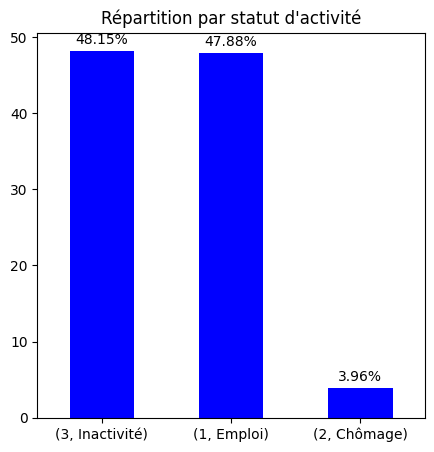

In [214]:
# Répartition des individus par statut d'activité
total = eec23_acteu.value_counts().sum()
pourcentages = eec23_acteu.value_counts() / total * 100

plt.figure(figsize=(5, 5))

ax = pourcentages.plot(kind='bar', color='b')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{i.get_height():.2f}%", ha='center', va='bottom')

plt.xlabel("")
plt.ylabel("")

plt.title("Répartition par statut d'activité")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

 On observe qu'il y a presque autant de personnes occupées(ou en emploi) qu'il y a de personnes inactives. Le taux de chômage est quand à lui relativement faible et d'environ 4%

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DE LA VARIABLE **Emploi actuel ou dernier emploi [ACL_EMPLOI]**
Champ : personnes en emploi ou ayant travaillé ACTEU = 1(emploi) ou ACTEU =2(chômage),3(Inactif) et AAC(Exercice d’une activité antérieure pour les personnes sans emploi)=1(Oui)

</div>

Extraction des codes et libellés des données classe d'emploi.

In [215]:
acl_emploi_varmod = varmod_eec23[varmod_eec23['COD_VAR'] == 'ACL_EMPLOI']
acl_emploi_varmod = acl_emploi_varmod.drop(columns=['TYPE_VAR', 'LONG_VAR'])
acl_emploi_dict = dict(zip(acl_emploi_varmod['COD_MOD'], acl_emploi_varmod['LIB_MOD']))
acl_emploi_dict['0'] = acl_emploi_dict.pop(np.nan)
print(acl_emploi_dict)

{'I1': 'Emploi indépendant de niveau supérieur', 'I2': 'Emploi indépendant de niveau intermédiaire', 'I3': 'Emploi de petit indépendant, avec salarié ou aide familiale', 'I4': 'Emploi de petit indépendant, sans salarié ou aide familiale', 'A1': "Emploi salarié de niveau supérieur, d'orientation technique, en CDI", 'A2': "Emploi salarié de niveau supérieur, d'orientation tertiaire, en CDI", 'A3': 'Emploi salarié de niveau supérieur, fonctionnaire', 'A4': 'Emploi salarié de niveau supérieur, en contrat à durée limitée', 'B1': "Emploi salarié de niveau intermédiaire, d'orientation technique, en CDI", 'B2': "Emploi salarié de niveau intermédiaire, d'orientation tertiaire, en CDI", 'B3': 'Emploi salarié de niveau intermédiaire, fonctionnaire', 'B4': 'Emploi salarié de niveau intermédiaire, en contrat à durée limitée', 'C1': "Emploi salarié qualifié, d'orientation ouvrière, en CDI", 'C2': "Emploi salarié qualifié, d'orientation employée, en CDI", 'C3': 'Emploi salarié qualifié, fonctionnaire

Création d'un dictionnaire permettant de faire correspondre les codes aux descriptions adéquates.

Préparation des données pour visualisation

In [216]:
# Création d'un dataframe vide
eec23_acl_emploi = pd.DataFrame()

# Création d'une colonne 'code_mod' contenant les données codées des modalités
eec23_acl_emploi['code_mod'] = eec23['ACL_EMPLOI'].fillna(0).astype(str)
eec23_acl_emploi['mod_lib'] = eec23_acl_emploi['code_mod'].map(acl_emploi_dict)
print(eec23_acl_emploi)

       code_mod                                            mod_lib
0            C2  Emploi salarié qualifié, d'orientation employé...
1            C1  Emploi salarié qualifié, d'orientation ouvrièr...
2            D1  Emploi salarié peu qualifié, d'orientation ouv...
3            B3  Emploi salarié de niveau intermédiaire, foncti...
4            D1  Emploi salarié peu qualifié, d'orientation ouv...
...         ...                                                ...
348619       C4  Emploi salarié qualifié, en contrat à durée li...
348620       C3             Emploi salarié qualifié, fonctionnaire
348621       D4  Emploi salarié peu qualifié, en contrat à duré...
348622       D4  Emploi salarié peu qualifié, en contrat à duré...
348623       B1  Emploi salarié de niveau intermédiaire, d'orie...

[348624 rows x 2 columns]


In [217]:
# Recherche de valeurs manquantes
missing_values = eec23_acl_emploi.isnull().sum()
print(missing_values)

code_mod    0
mod_lib     0
dtype: int64


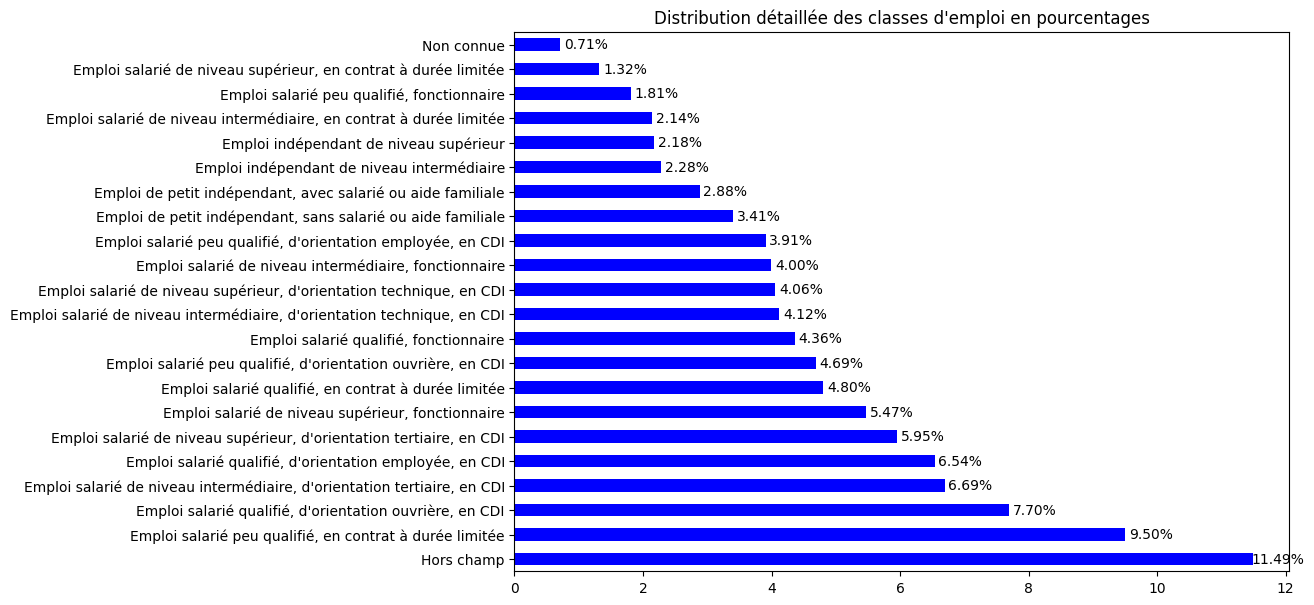

In [218]:
# Graphique en barres
total = eec23_acl_emploi['mod_lib'].value_counts().sum()
pourcentages = eec23_acl_emploi['mod_lib'].value_counts() / total * 100

plt.figure(figsize=(10, 7))

ax = pourcentages.plot(kind='barh', color='b')
for i in ax.patches:
    ax.text(i.get_width() + 0.4, i.get_y() + i.get_height() / 2, f"{i.get_width():.2f}%", ha='center', va='center')

plt.xlabel("")
plt.ylabel("")

plt.title("Distribution détaillée des classes d'emploi en pourcentages")
plt.show()


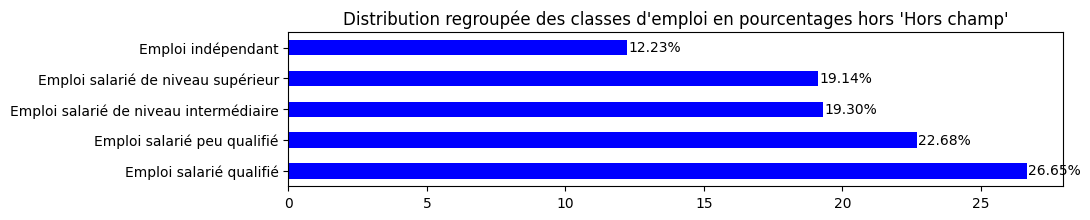

In [219]:
# Extraction du premier caractère de codes des modalités afin de les regrouper en classes
eec23_acl_emploi['code_mod_category'] = eec23_acl_emploi['code_mod'].apply(lambda x: x[0] if pd.notnull(x) else x)

# Définition d'un dictionnaire de classes
dictionnaire = {
    'A': 'Emploi salarié de niveau supérieur',
    'B': 'Emploi salarié de niveau intermédiaire',
    'C': 'Emploi salarié qualifié',
    'D': 'Emploi salarié peu qualifié',
    'I': 'Emploi indépendant'
}

# Correspondance
eec23_acl_emploi['classes'] = eec23_acl_emploi['code_mod_category'].map(dictionnaire)

# Calcul des pourcentages
total = eec23_acl_emploi['classes'].value_counts().sum()
pourcentages = eec23_acl_emploi['classes'].value_counts() / total * 100

plt.figure(figsize=(10, 2))

ax = pourcentages.plot(kind='barh', color='b')
for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + i.get_height() / 2, f"{i.get_width():.2f}%", ha='center', va='center')


plt.xlabel("")
plt.ylabel("")


plt.title("Distribution regroupée des classes d'emploi en pourcentages hors 'Hors champ'")
plt.show()

Dans un premier temps, on observe qu'environ 12 % des personnes enquêtées ne sont pas en emploi et n'ont pas exercé d'activité antérieure.

Par ailleurs, les emplois salariés peu qualifiés en CDD constituent la classe d'emploi la plus recrutée, représentant environ 10 % du total. Cela inclut probablement de la main-d'œuvre ponctuelle (intérim) et possiblement des emplois secondaires. Une analyse plus approfondie, notamment en examinant le nombre d'heures travaillées, pourrait être intéressante. Les emplois salariés peu qualifiés en CDD pourraient représenter un grand nombre de contrats, mais un faible nombre d'heures travaillées.

En regroupant les données, on constate que les emplois salariés qualifiés dominent le marché du travail, représentant environ 27 % des emplois, suivis par les emplois salariés peu qualifiés à hauteur de 23 %. Les emplois salariés de niveau intermédiaire et les emplois salariés de niveau supérieur sont relativement au même niveau, soit 19 % chacun.

Quant aux emplois indépendants, ils recrutent beaucoup moins et représentent environ 12 % du total.

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DE LA VARIABLE **"Exercice d'une activité professionnelle régulière antérieure, pour les inactifs, chômeurs et personnes ayant une activité temporaire ou d'appoint autre qu'un emploi informel"[AAC]**
Champ : personnes sans emploi ACTEU=2 (chômage), 3(Inactif)

</div>

In [220]:
#Création d'un dictionnaire pour les modalités de la variable ACTEU
aac_varmod = varmod_eec23[varmod_eec23['COD_VAR'] == 'AAC']
aac_varmod = aac_varmod.drop(columns=['TYPE_VAR', 'LONG_VAR'])
aac_dict = dict(zip(aac_varmod['COD_MOD'], aac_varmod['LIB_MOD']))
aac_dict['0'] = aac_dict.pop(np.nan)
print(aac_dict)

{'1': 'Oui', '2': 'Non', '9': 'Non réponse', '0': 'Hors champ'}


In [221]:
eec23_aac = pd.DataFrame()
eec23_aac['code_mod'] = eec23['AAC'].fillna(0).astype(int).astype(str)
eec23_aac['mod_lib'] = eec23_aac['code_mod'].map(aac_dict)
print(eec23_aac)

       code_mod     mod_lib
0             1         Oui
1             1         Oui
2             1         Oui
3             1         Oui
4             0  Hors champ
...         ...         ...
348619        1         Oui
348620        1         Oui
348621        1         Oui
348622        1         Oui
348623        0  Hors champ

[348624 rows x 2 columns]


In [222]:
# Recherche de valeurs manquantes
missing_values = eec23_aac.isnull().sum()
print(missing_values)

code_mod    0
mod_lib     0
dtype: int64


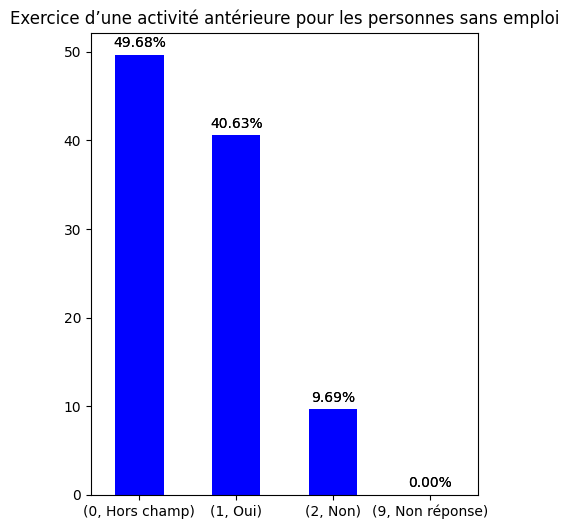

In [223]:
total = eec23_aac.value_counts().sum()
pourcentages = eec23_aac.value_counts() / total * 100

plt.figure(figsize=(5, 6))
ax = pourcentages.plot(kind='bar', color='b')

ax = pourcentages.plot(kind='bar', color='b')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{i.get_height():.2f}%", ha='center', va='bottom')

plt.xlabel("")
plt.ylabel("")

plt.title("Exercice d’une activité antérieure pour les personnes sans emploi")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

Il est notable que la majorité des personnes sans emploi, soit 41 % des enquêtés, sont en activité ou ont déjà exercé une activité professionnelle. Le faible taux de non-réponse, proche de zéro, est également rassurant et souligne la qualité des données collectées. Cependant, il est inquiétant de constater que 50 %, soit près de la moitié des personnes enquêtées, ne se trouvent pas dans le champ de la variable pourtant assez large. Cela représente-t-il des emplois informels ? Ou est-ce lié à la semaine de référence ?

Il serait intéressant de se pencher sur le profil des personnes sans emploi n'ayant jamais exercé d'activité professionnelle ainsi que sur la durée de leur chômage afin de mieux comprendre les dynamiques en jeu. De plus, des analyses plus approfondies seraient nécessaires pour comprendre pourquoi autant de personnes sortent du champ de la variable.

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DE LA VARIABLE **"Age en 6 tranches"[AGE6]**  \
Champ : ensemble des personnes

</div>

In [224]:
#Création d'un dictionnaire pour les modalités de la variable ACTEU
age_varmod = varmod_eec23[varmod_eec23['COD_VAR'] == 'AGE6']
age_varmod = age_varmod.drop(columns=['TYPE_VAR', 'LONG_VAR'])
age_dict = dict(zip(age_varmod['COD_MOD'], age_varmod['LIB_MOD']))
print(age_dict)

{'00': '14 ans ou moins', '15': '15-24 ans', '25': '25-49 ans', '50': '50-64 ans', '65': '65-89 ans', '90': '90 ans ou plus'}


In [225]:
eec23_age = pd.DataFrame()
eec23_age['code_mod'] = eec23['AGE6'].fillna(0).astype(int).astype(str)
eec23_age['mod_lib'] = eec23_age['code_mod'].map(age_dict)
print(eec23_age)

       code_mod    mod_lib
0            65  65-89 ans
1            65  65-89 ans
2            65  65-89 ans
3            65  65-89 ans
4            50  50-64 ans
...         ...        ...
348619       65  65-89 ans
348620       65  65-89 ans
348621       65  65-89 ans
348622       50  50-64 ans
348623       25  25-49 ans

[348624 rows x 2 columns]


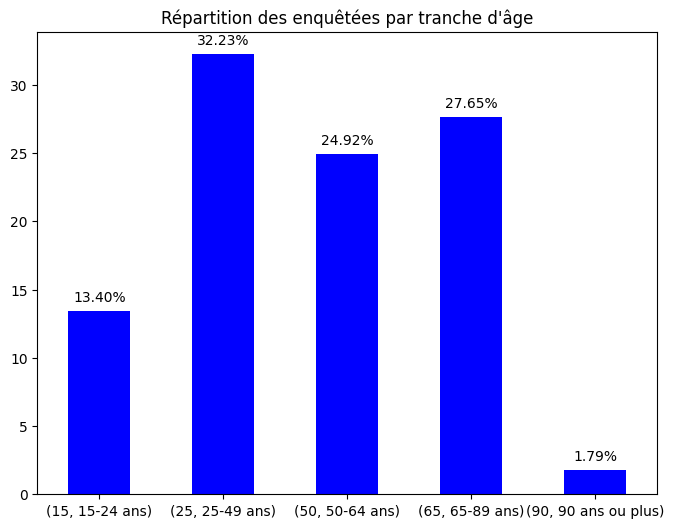

In [226]:
#Répartition des personnes enquêtées par tranche d'âge

total = eec23_age.value_counts().sum()
pourcentages = eec23_age.value_counts(sort=False) / total * 100

plt.figure(figsize=(8, 6))

ax = pourcentages.plot(kind='bar', color='b')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{i.get_height():.2f}%", ha='center', va='bottom')

plt.xlabel("")
plt.ylabel("")

plt.title("Répartition des enquêtées par tranche d'âge")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

Ce graphique, bien que complexe à interpréter, nous fournit néanmoins quelques informations cruciales sur la distribution des âges de l'échantillon. On remarque que la classe d'âge la plus représentée regroupe les personnes âgées de 25 à 49 ans. Environ 30 % des personnes enquêtées ont plus de 65 ans. L'âge moyen de la retraite en France étant de 63 ans en 2023 (https://www.retraite.com/dossier-retraite/chiffres-cles-retraite-cnav.html), ces personnes sont probablement déjà à la retraite. Il serait intéressant d'examiner plus en détail comment les données sont réellement réparties au sein de ces classes d'âge. Malheureusement, nous ne disposons pas des âges réels des personnes enquêtées dans ce jeu de données ; les âges sont regroupés et codés par classes.

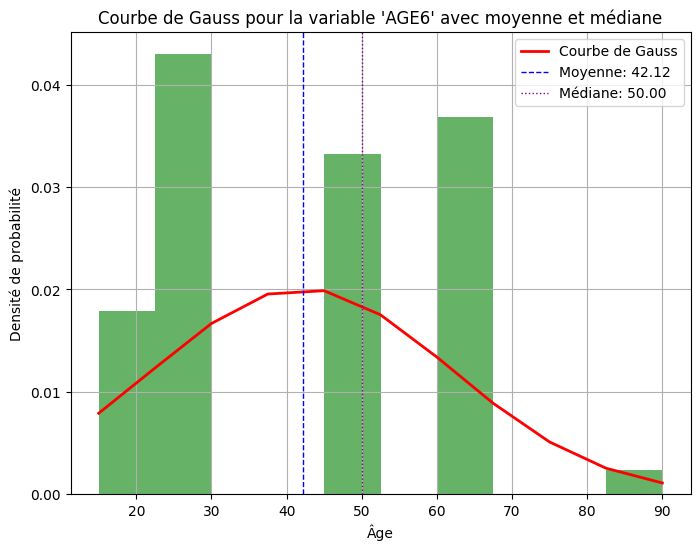

In [227]:
int_eec23_age = eec23_age['code_mod'].astype(int)

# Calcul des paramètres de la distribution normale (moyenne et écart-type)
mu, sigma = int_eec23_age.mean(), int_eec23_age.std()
median = int_eec23_age.median()

# Tracé de l'histogramme des âges
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(int_eec23_age, bins=10, density=True, alpha=0.6, color='g')

# Calcul de la courbe de Gauss
gauss_curve = norm.pdf(bins, mu, sigma)

# Tracé de la courbe de Gauss
plt.plot(bins, gauss_curve, linewidth=2, color='r', label='Courbe de Gauss')

# Ajout des lignes pour la moyenne et la médiane
plt.axvline(mu, color='b', linestyle='dashed', linewidth=1, label=f'Moyenne: {mu:.2f}')
plt.axvline(median, color='#800080', linestyle='dotted', linewidth=1, label=f'Médiane: {median:.2f}')


plt.title("Courbe de Gauss pour la variable 'AGE6' avec moyenne et médiane")
plt.xlabel("Âge")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.grid(True)
plt.show()

In [228]:
# Calcul des statistiques descriptives
statistiques_descriptives = {
    'moyenne': int_eec23_age.mean(),
    'médiane': int_eec23_age.median(),
    'mode': int_eec23_age.mode().values[0],
    'écart_type': int_eec23_age.std(),
    'minimum': int_eec23_age.min(),
    'maximum': int_eec23_age.max(),
    'quantiles': int_eec23_age.quantile([0.25, 0.5, 0.75]).to_dict(),
    'variance': int_eec23_age.var(),
    'skewness': int_eec23_age.skew(),
    'kurtosis': int_eec23_age.kurtosis()
}

# Affichage des statistiques descriptives
for stat, valeur in statistiques_descriptives.items():
    print(f'{stat}: {valeur}')

moyenne: 42.117998187158655
médiane: 50.0
mode: 25
écart_type: 19.858742148518523
minimum: 15
maximum: 90
quantiles: {0.25: 25.0, 0.5: 50.0, 0.75: 65.0}
variance: 394.3696397213461
skewness: 0.14244757492726018
kurtosis: -1.2562891473200504


Afin de pouvoir analyser plus en détail la distribution de la variable 'AGE6', j'ai réalisé un histogramme combiné à une courbe de Gauss. Ce graphique permet de bien illustrer les statistiques descriptives.

L'âge minimum est de 15 ans et l'âge maximum de 90 ans. L'âge moyen étant de 42 ans, cela donne une idée générale de l'âge central de la population étudiée. Avec un âge médian de 50 ans, il est peu probable qu'il y ait des valeurs aberrantes, compte tenu de la proximité entre la moyenne et la médiane. Cela est cohérent avec une kurtosis négative (-1,26), indiquant que la distribution est aplatie par rapport à une distribution normale, ce qui signifie moins de valeurs extrêmes.

L'écart-type de 19,86 ans montre une dispersion importante des âges autour de la moyenne, ce qui indique une grande variation dans les âges des individus. Cela peut être dû au fait que les données sont regroupées par classes, avec des intervalles de 10 à 25 ans entre chaque classe.

L'analyse des quantiles montre que 25 % des individus ont moins de 25 ans, 50 % ont moins de 50 ans (la médiane) et 75 % ont moins de 65 ans. L'échantillon a probablement été conçu en prenant en compte ces paramètres. En mettant cela en parallèle avec l'âge moyen de la retraite en France, nous constatons que l'échantillon contient environ 35 % de personnes potentiellement à la retraite, comme expliqué précédemment.

La variance élevée (394,37) est cohérente avec l'écart-type élevé, indiquant une grande diversité des âges. Cela peut être dû au regroupement des données par classes, comme mentionné plus haut.

Enfin, un skewness positif (0,14) indique que la distribution des âges est légèrement asymétrique et penchée vers la droite, ce qui signifie qu'il y a quelques valeurs élevées influençant la moyenne. Cela est tout à fait normal et cohérent avec le fait que la médiane se trouve légèrement à droite de la moyenne.

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DE LA VARIABLE **"Diplôme le plus élevé obtenu"[DIP7]**  \
Champ : personnes de 15-89 ans (15<=AGE<=89)

</div>

In [229]:
dip_varmod = varmod_eec23[varmod_eec23['COD_VAR'] == 'DIP7']
dip_varmod = dip_varmod.drop(columns=['TYPE_VAR', 'LONG_VAR'])
dip_dict = dict(zip(dip_varmod['COD_MOD'], dip_varmod['LIB_MOD']))
dip_dict['0'] = dip_dict.pop(np.nan)
print(dip_dict)

{'1': 'Diplôme de nvieau bac+5 ou plus (doctorat, master ou équivalent)', '2': 'Diplôme de nvieau bac+3/4 (licence, maîtrise ou équivalent)', '3': 'Diplôme de nvieau bac+2 (DUT, BTS, Deug ou équivalent)', '4': 'Bac général, technologique, professionnel ou équivalent', '5': 'CAP, BEP ou équivalent', '6': 'BEPC, DNB, brevet des collèges', '7': "Aucun diplôme, certificat d'études primaires", '9': 'Non réponse', '0': 'Hors champ'}


In [230]:
eec23_dip = pd.DataFrame()
eec23_dip['code_mod'] = eec23['DIP7'].fillna(0).astype(int).astype(str)
eec23_dip['mod_lib'] = eec23_dip['code_mod'].map(dip_dict)
print(eec23_dip)

       code_mod                                            mod_lib
0             7       Aucun diplôme, certificat d'études primaires
1             7       Aucun diplôme, certificat d'études primaires
2             7       Aucun diplôme, certificat d'études primaires
3             3  Diplôme de nvieau bac+2 (DUT, BTS, Deug ou équ...
4             2  Diplôme de nvieau bac+3/4 (licence, maîtrise o...
...         ...                                                ...
348619        7       Aucun diplôme, certificat d'études primaires
348620        5                             CAP, BEP ou équivalent
348621        5                             CAP, BEP ou équivalent
348622        7       Aucun diplôme, certificat d'études primaires
348623        3  Diplôme de nvieau bac+2 (DUT, BTS, Deug ou équ...

[348624 rows x 2 columns]


In [231]:
# Recherche de valeurs manquantes
missing_values = eec23_dip.isnull().sum()
print(missing_values)

code_mod    0
mod_lib     0
dtype: int64


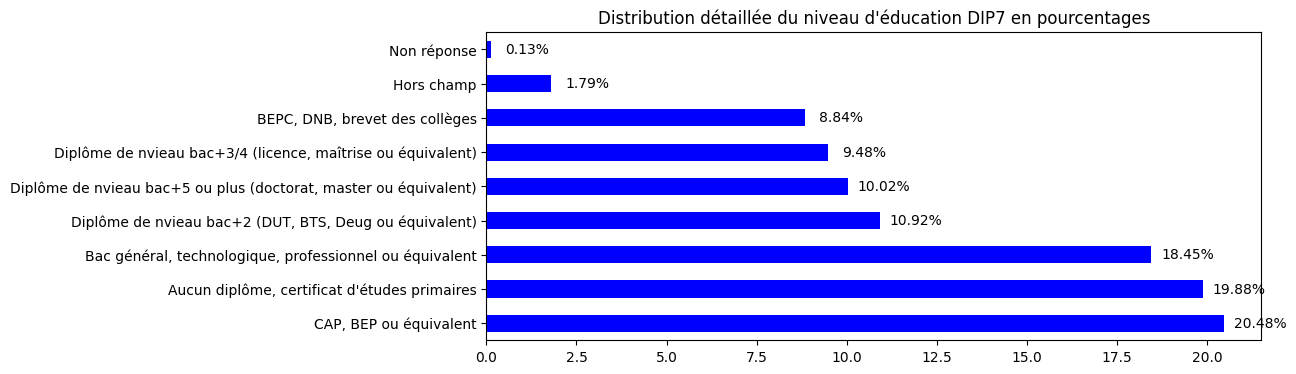

In [241]:
# Graphique en barres
total = eec23_dip['mod_lib'].value_counts().sum()
pourcentages = eec23_dip['mod_lib'].value_counts() / total * 100

plt.figure(figsize=(10, 4))

ax = pourcentages.plot(kind='barh', color='b')
for i in ax.patches:
    ax.text(i.get_width() + 1, i.get_y() + i.get_height() / 2, f"{i.get_width():.2f}%", ha='center', va='center')

plt.xlabel("")
plt.ylabel("")

plt.title("Distribution détaillée du niveau d'éducation DIP7 en pourcentages")
plt.show()

<div style="background-color: purple; padding: 10px; border-radius: 5px;">

ANALYSE DE LA VARIABLE **SEXE"[SEXE]**  \
Champ : ensemble des personnes 

</div>

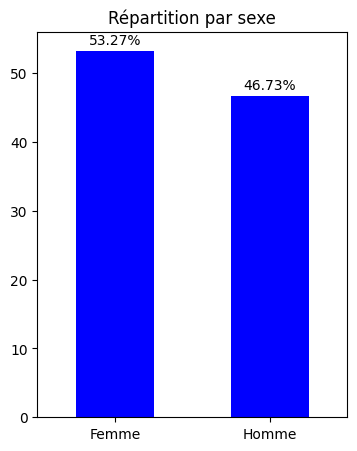

In [244]:
sexe_dict = {
    '1': 'Homme',
    '2': 'Femme'
}

eec23_sexe = pd.DataFrame()
eec23_sexe['code_mod'] = eec23['SEXE'].astype(str)
eec23_sexe['mod_lib'] = eec23_sexe['code_mod'].map(sexe_dict)


# Graphique en barres
total = eec23_sexe['mod_lib'].value_counts().sum()
pourcentages = eec23_sexe['mod_lib'].value_counts() / total * 100

plt.figure(figsize=(4, 5))
ax = pourcentages.plot(kind='bar', color='b')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{i.get_height():.2f}%", ha='center', va='bottom')

plt.xlabel("")
plt.ylabel("")

plt.title("Répartition par sexe")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.show()

<Figure size 1000x400 with 0 Axes>

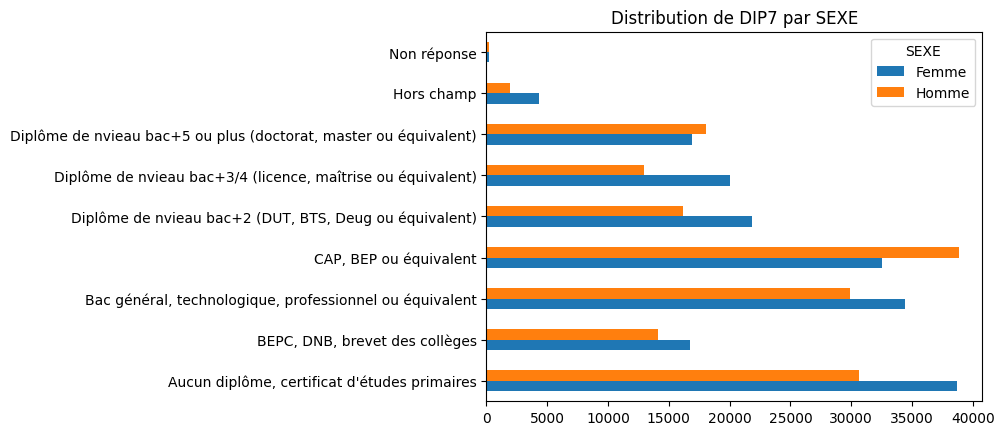

In [243]:
grouped = pd.DataFrame()
#Répartition des individus par sexe et par niveau d'éducation
plt.figure(figsize=(10,4))
grouped['DIP7'] = eec23['DIP7'].fillna(0).astype(int).astype(str).map(dip_dict)
grouped['SEXE'] = eec23['SEXE'].astype(str).map(sexe_dict)
eec23_grouped = grouped.groupby(['DIP7', 'SEXE']).size().unstack().fillna(0).astype(int)
eec23_grouped.plot(kind='barh')
plt.title('Distribution de DIP7 par SEXE')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
# régression linéaire entre l'age, l'ancienneté (expérience), le sexe, le niveau d'éducation et le statut d'activité
X = eec23[['AGE6', 'AAC', 'SEXE', 'DIP7']]
y = eec23['ACTEU']

# Imputation des valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Création du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Affichage des coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.6611672969914926
Coefficients: [0.02285707 0.62452458 0.08465142 0.13325212]
Intercept: -0.41978543104179744


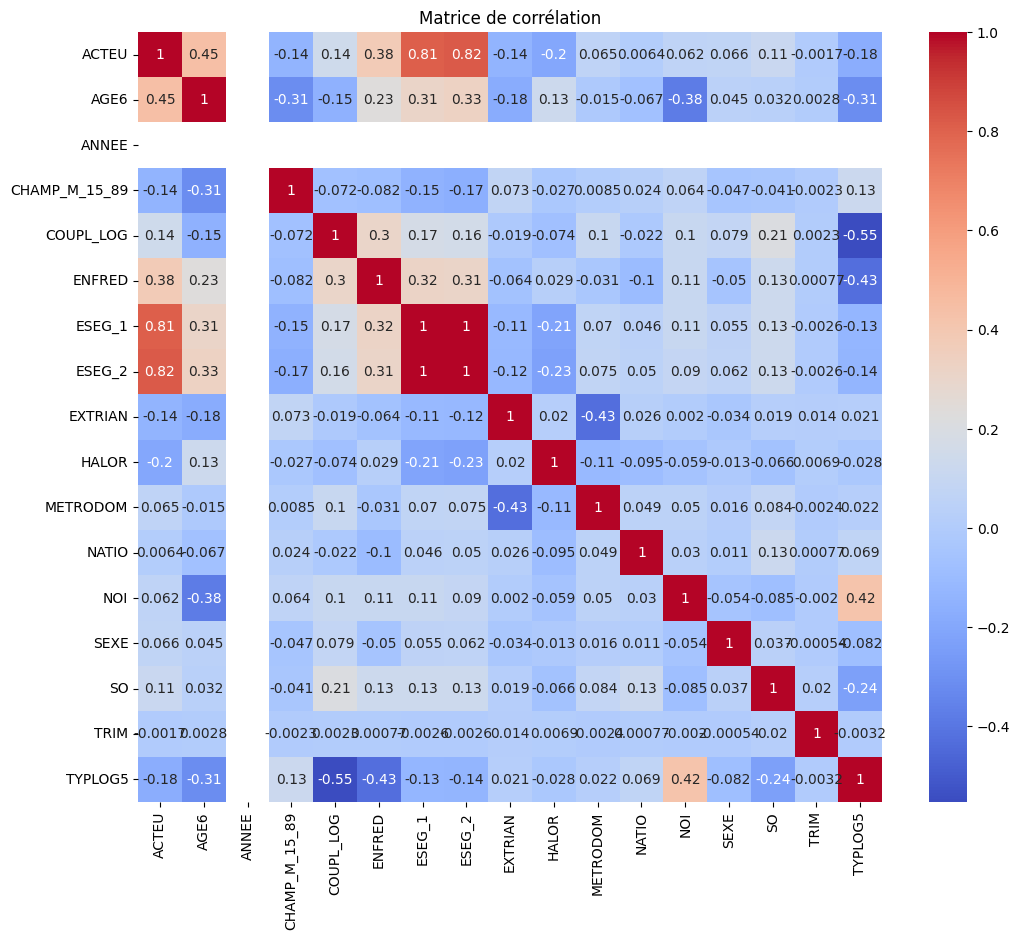

In [ ]:
# Calcul de la matrice de corrélation
eec23_nonulls = eec23.dropna(axis=1)
corr_matrix = eec23_nonulls.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matrice de corrélation')
plt.show()

DataFrame avec les colonnes mentionnées:
        ACTEU_2  ACTEU_3  AAC_2.0  AAC_9.0  SEXE_2  DIP7_2.0  DIP7_3.0  \
0         False     True    False    False   False     False     False   
1         False     True    False    False   False     False     False   
2         False     True    False    False    True     False     False   
3         False     True    False    False    True     False      True   
4         False    False    False    False   False      True     False   
...         ...      ...      ...      ...     ...       ...       ...   
348619    False     True    False    False   False     False     False   
348620    False     True    False    False    True     False     False   
348621    False     True    False    False    True     False     False   
348622    False     True    False    False   False     False     False   
348623    False    False    False    False   False     False      True   

        DIP7_4.0  DIP7_5.0  DIP7_6.0  ...  ACL_EMPLOI_C3  ACL_EMPLOI_C

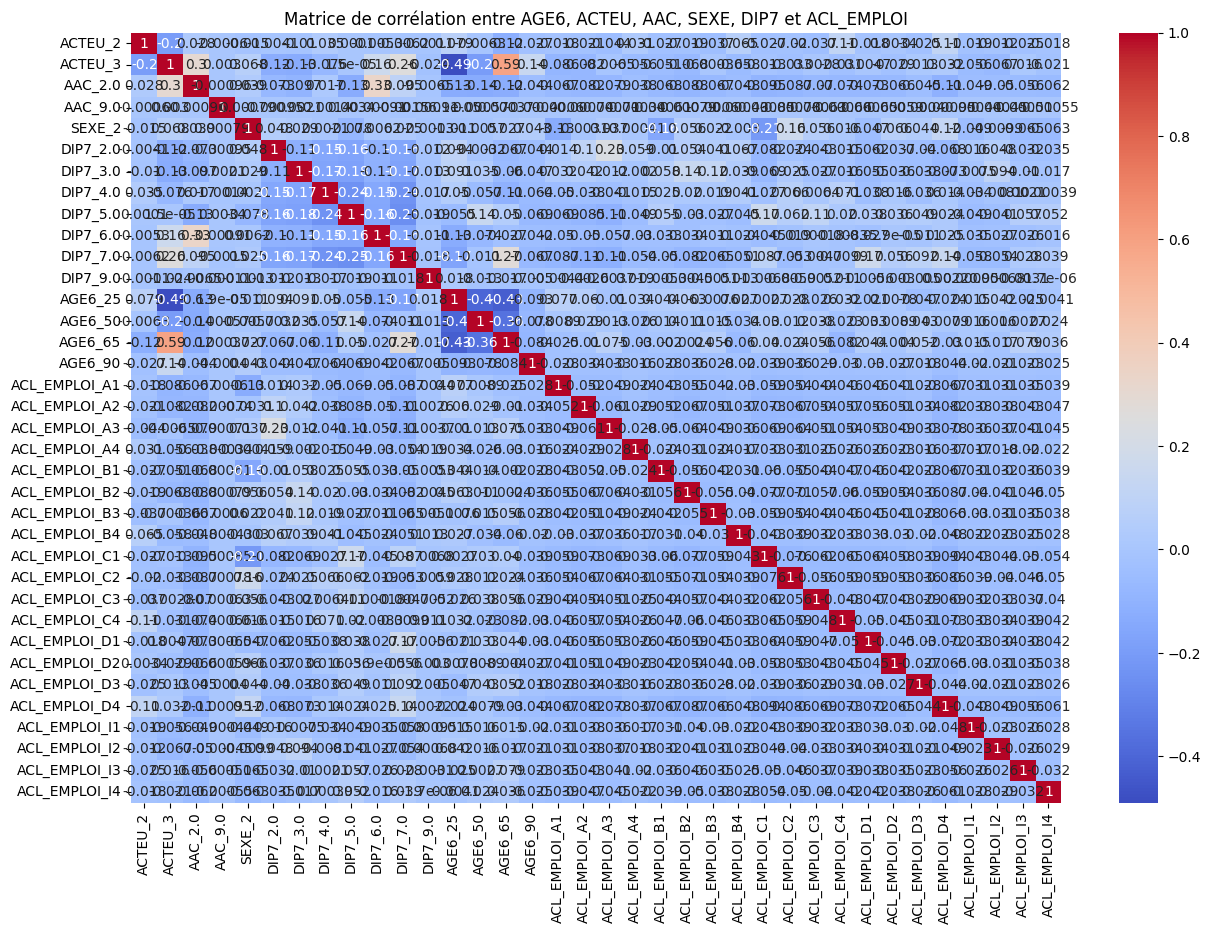

In [242]:
dat = pd.get_dummies(eec23, columns=['ACTEU', 'AAC', 'SEXE', 'DIP7', 'AGE6', 'ACL_EMPLOI'], drop_first=True)

# Sélection des colonnes mentionnées
selected_columns = ['AGE6', 'ACTEU', 'AAC', 'SEXE', 'DIP7', 'ACL_EMPLOI']
dat = dat[[col for col in dat.columns if any(sel_col in col for sel_col in selected_columns)]]

# Affichage du DataFrame contenant uniquement les colonnes mentionnées
print("DataFrame avec les colonnes mentionnées:")
print(dat)

# Calcul de la matrice de corrélation
corr_matrix = dat.corr()

# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Matrice de corrélation entre AGE6, ACTEU, AAC, SEXE, DIP7 et ACL_EMPLOI')
plt.show()

<div style="background-color: green; padding: 10px; border-radius: 5px;">

PROJET EN COURS...

</div>